In [30]:
import pandas as pd
from textblob import TextBlob
import nltk 
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



In [31]:
# Load the data
data = pd.read_csv('Elon_musk.csv',encoding='latin-1')
data = data.drop(columns='Unnamed: 0')
data

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [32]:
lemma = WordNetLemmatizer()

In [33]:
corpus = []

for i in range(len(data)):
    msg = re.sub('[^a-zA-Z]',' ',data['Text'][i]) #Clean the text
    msg = msg.lower() #Text normalization
    msg = msg.split() #Word tokenize
    msg = [lemma.lemmatize(i) for i in msg if i not in stopwords.words('english')] #Lemmatization
    msg = ' '.join(msg) # Join sentences
    corpus.append(msg)

In [34]:
corpus

['kunalb alien',
 'id aa carmack ray tracing cyberpunk hdr next level tried',
 'joerogan spotify great interview',
 'gtera doge underestimated',
 'teslacn congratulation tesla china amazing execution last year next even',
 'happy new year ox http co wfkmyu oj',
 'frodo underdoge thought would fail http co zgxjfdzzrm',
 'owensparks flcnhvy anonyx haha thanks',
 'flcnhvy anonyx indeed tweet definitely represent real world time allocation',
 'entertaining outcome likely',
 'givedirectly sent',
 'agree clubhouse kanyewest',
 'http co rwe uhsts',
 'geoffkeighley unrealengine getting real',
 'bought dogecoin lil x toddler hodler',
 'joshmanmode definitely issue sentencing seems bit high',
 'freewalletorg thanks fixing',
 'freewalletorg please unlock account',
 'astrojordy u f u f',
 'true power haha http co fc uhqsd',
 'freewalletorg crypto wallet give private key avoided cost',
 'freewalletorg app suck',
 'rt spacex nasa selected falcon heavy launch first two element lunar gateway together 

In [35]:
data['cleaned_tweet'] = corpus

In [36]:
data

,Text,cleaned_tweet
0,@kunalb11 Im an alien,kunalb alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,id aa carmack ray tracing cyberpunk hdr next l...
2,@joerogan @Spotify Great interview!,joerogan spotify great interview
3,@gtera27 Doge is underestimated,gtera doge underestimated
4,@teslacn Congratulations Tesla China for amazi...,teslacn congratulation tesla china amazing exe...
...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",flcnhvy true sound surreal negative propaganda...
1995,@PPathole Make sure to read ur terms &amp; con...,ppathole make sure read ur term amp condition ...
1996,@TeslaGong @PPathole Samwise Gamgee,teslagong ppathole samwise gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,ppathole altho dumb dumber u f u f


In [37]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()



In [38]:
def get_sentiment_score(cleaned_tweet):
    sentiment_scores = sid.polarity_scores(cleaned_tweet)
    return sentiment_scores['compound']




In [39]:
data['sentiment_score'] = data['cleaned_tweet'].apply(get_sentiment_score)



In [40]:
data['sentiment'] = data['sentiment_score'].apply(lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral'))



In [41]:
data

,Text,cleaned_tweet,sentiment_score,sentiment
0,@kunalb11 Im an alien,kunalb alien,0.0000,neutral
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,id aa carmack ray tracing cyberpunk hdr next l...,0.0000,neutral
2,@joerogan @Spotify Great interview!,joerogan spotify great interview,0.6249,positive
3,@gtera27 Doge is underestimated,gtera doge underestimated,-0.2732,negative
4,@teslacn Congratulations Tesla China for amazi...,teslacn congratulation tesla china amazing exe...,0.8271,positive
...,...,...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",flcnhvy true sound surreal negative propaganda...,-0.0000,neutral
1995,@PPathole Make sure to read ur terms &amp; con...,ppathole make sure read ur term amp condition ...,0.5994,positive
1996,@TeslaGong @PPathole Samwise Gamgee,teslagong ppathole samwise gamgee,0.0000,neutral
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,ppathole altho dumb dumber u f u f,-0.7003,negative


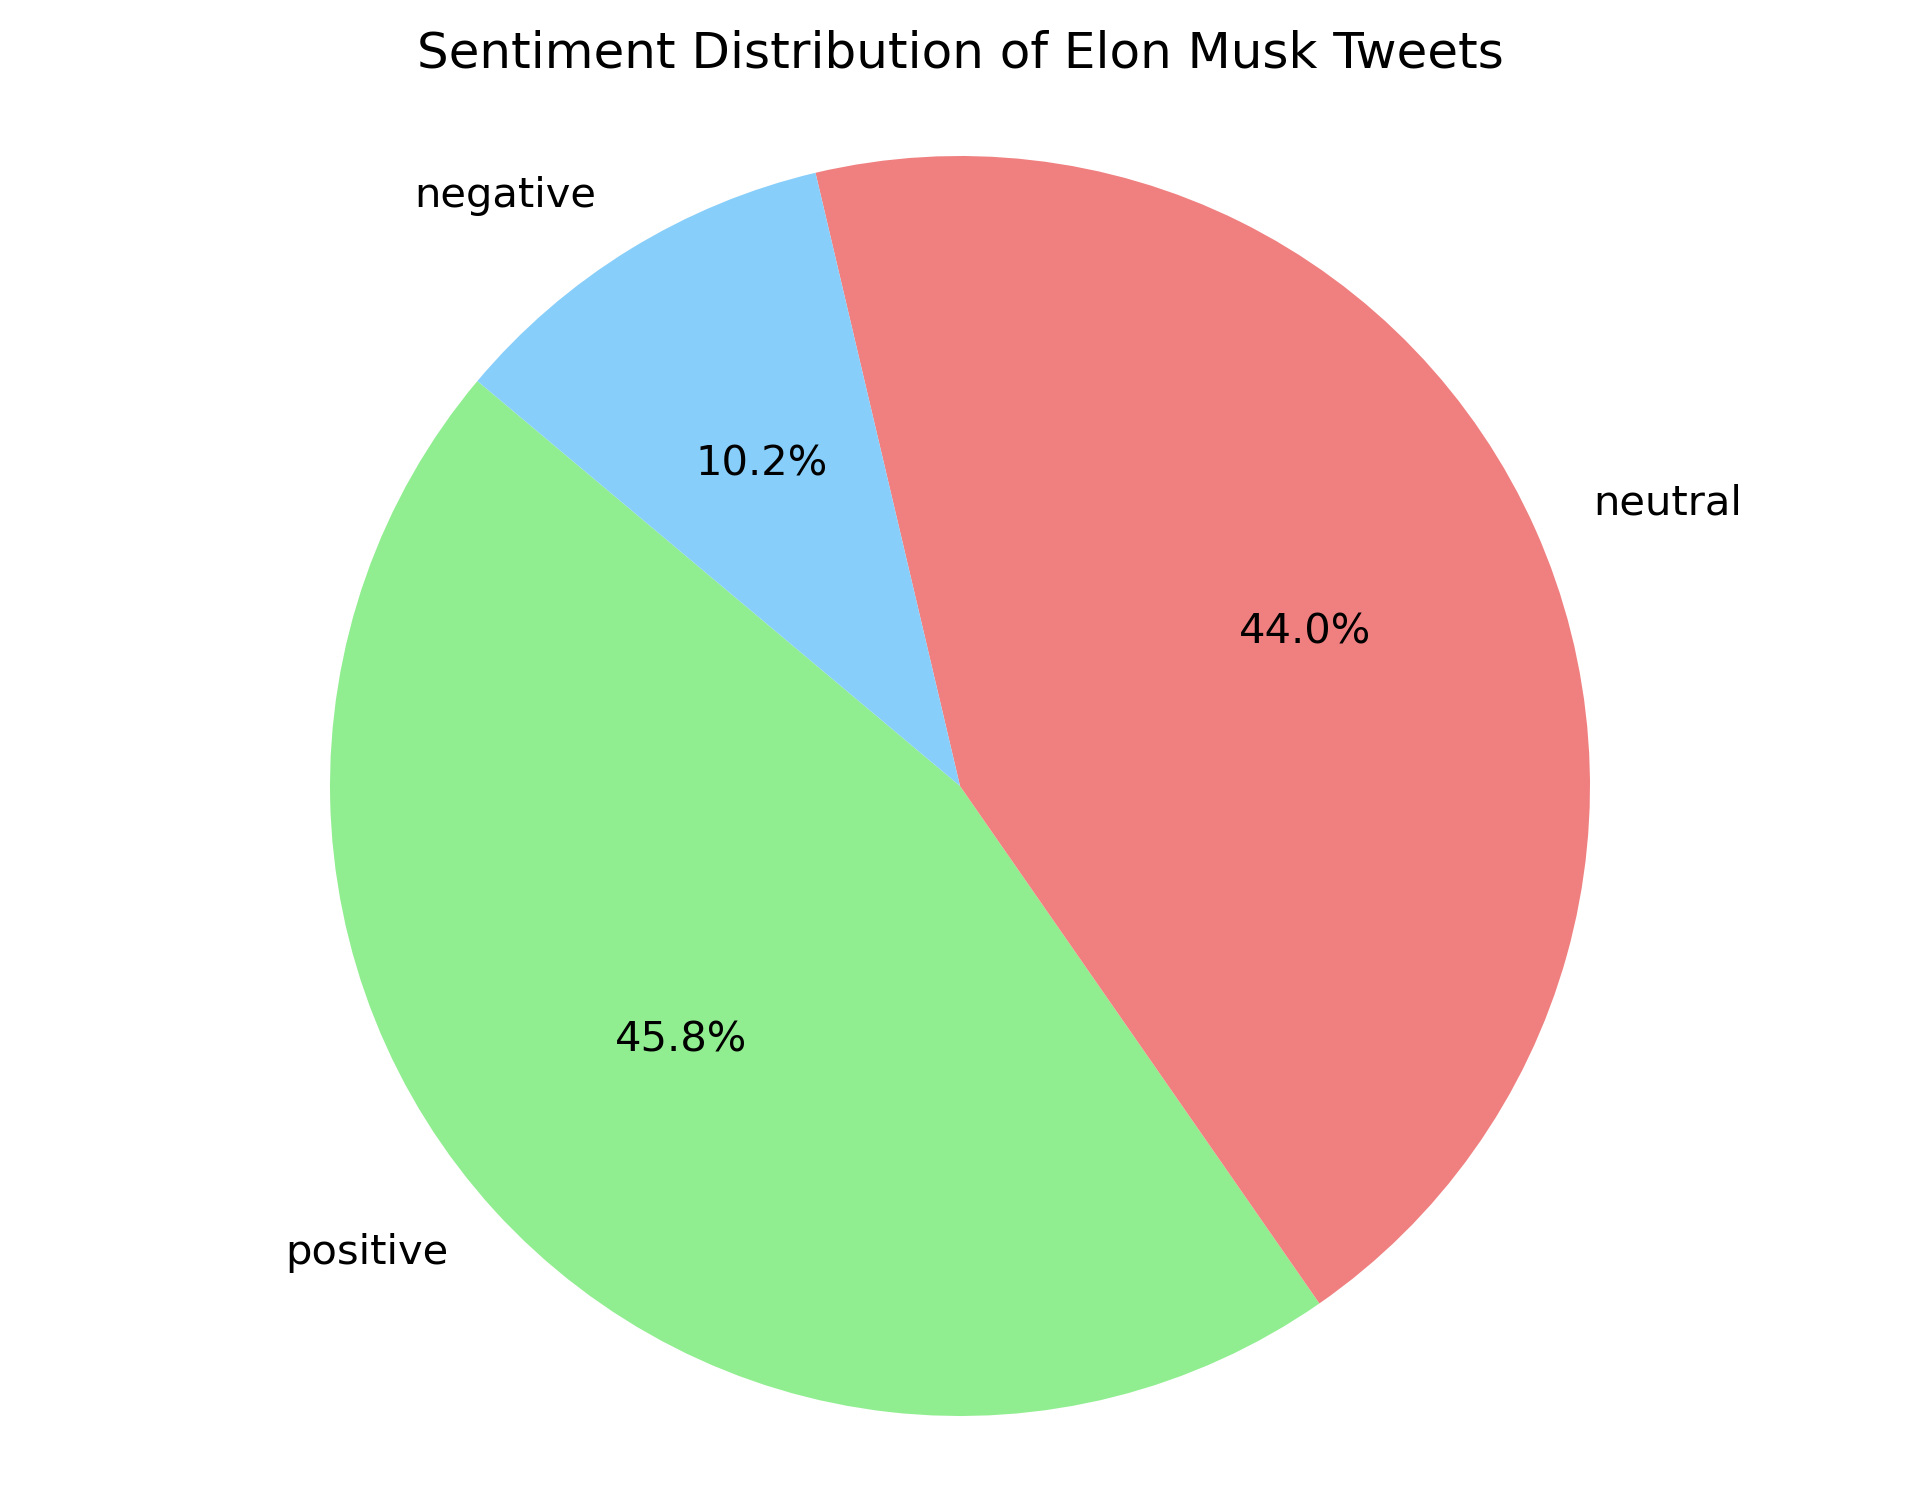

In [42]:
sentiment_counts = data['sentiment'].value_counts()
colors = ['lightgreen', 'lightcoral', 'lightskyblue']
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Elon Musk Tweets')
plt.axis('equal')
plt.show()


Text(0, 0.5, 'Frequency')

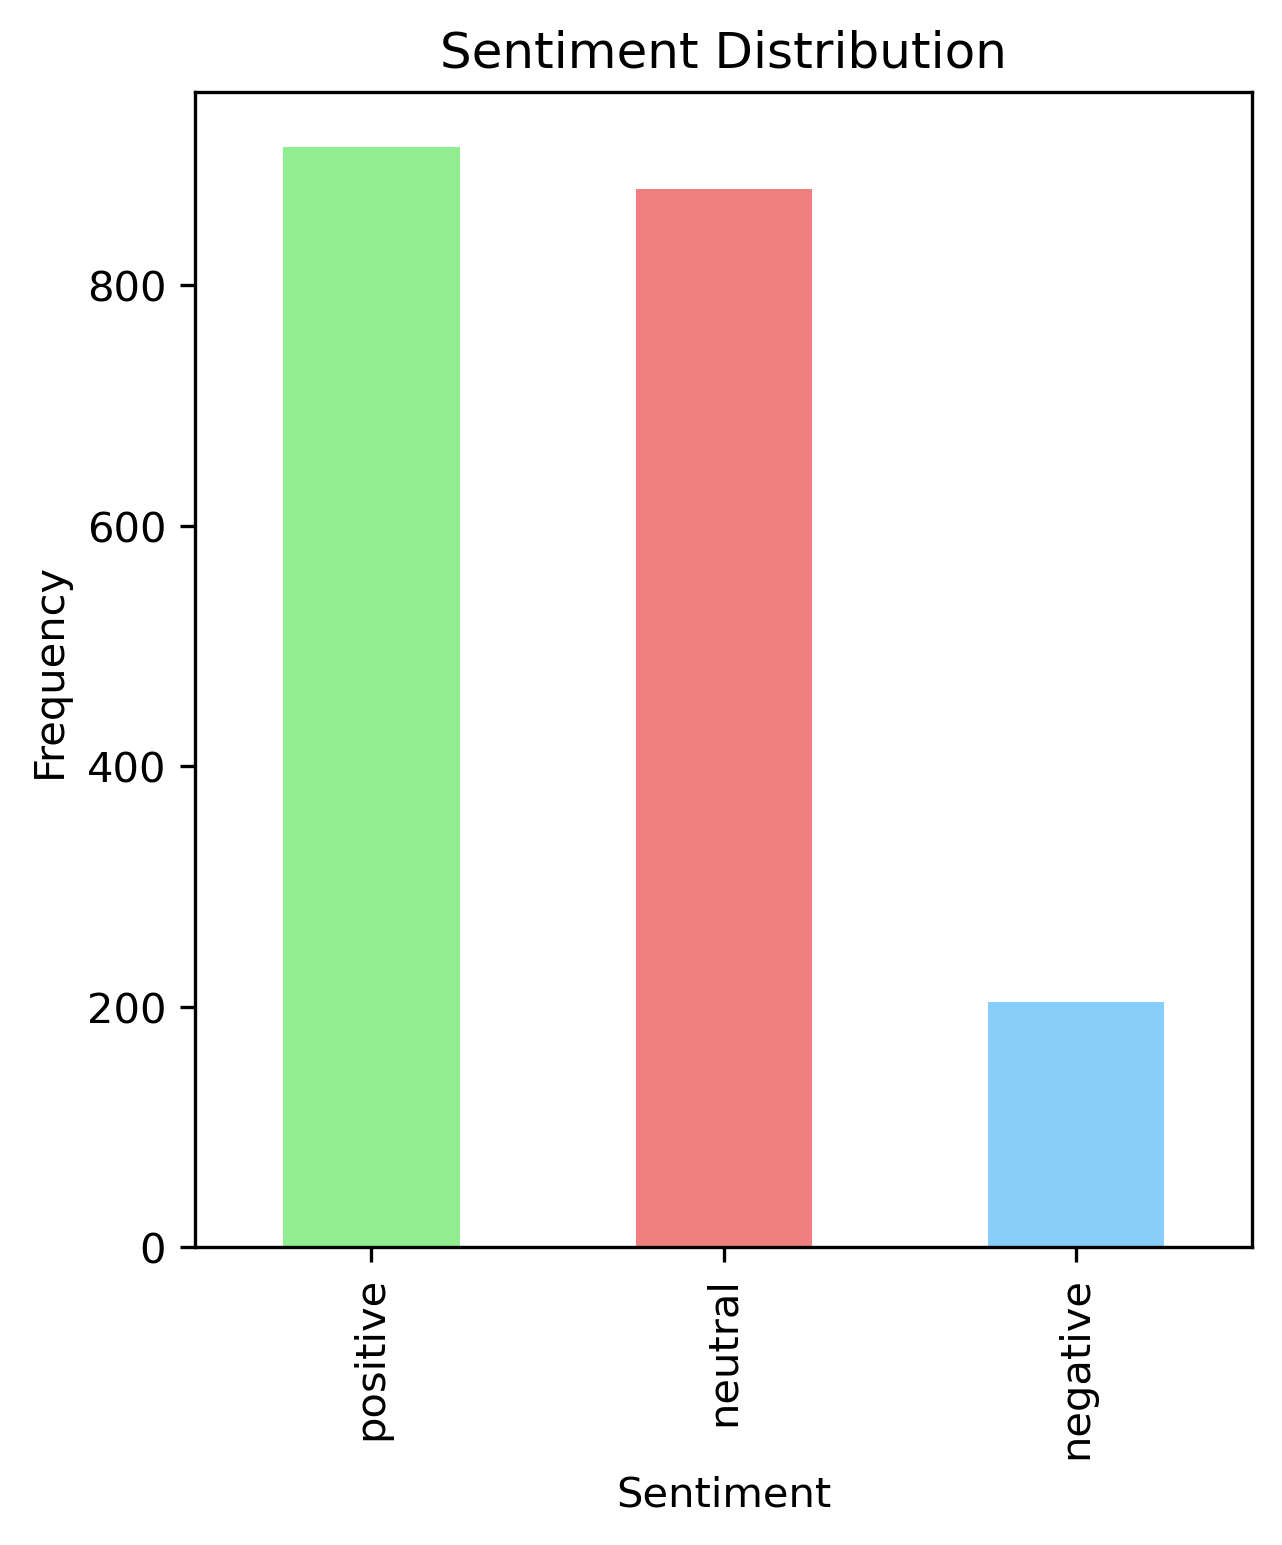

In [43]:
plt.subplot(1, 2, 1)
sentiment_counts.plot(kind='bar', color=colors)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')


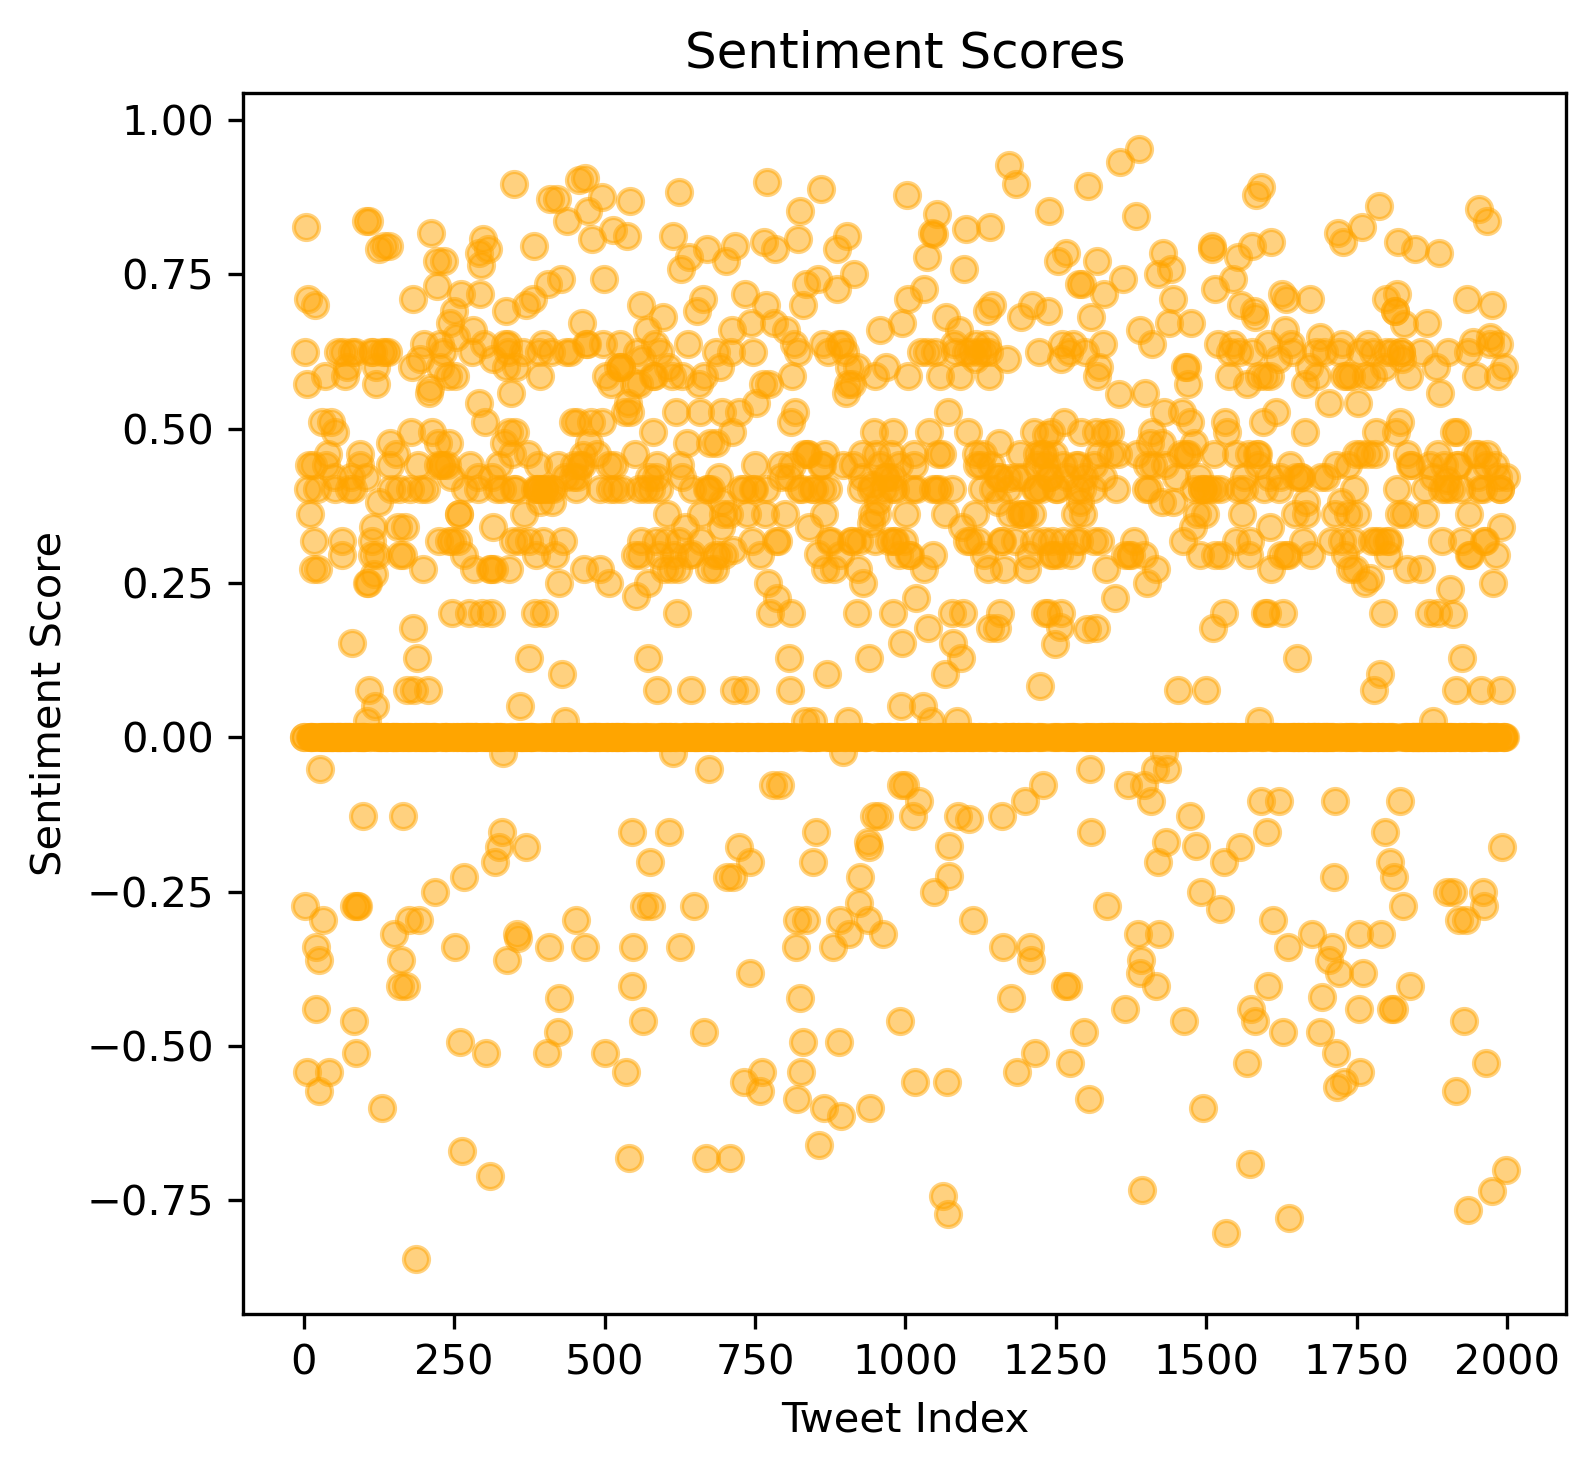

In [44]:
plt.subplot(1, 2, 2)
plt.scatter(range(len(data)), data['sentiment_score'], color='orange', alpha=0.5)
plt.title('Sentiment Scores')
plt.xlabel('Tweet Index')
plt.ylabel('Sentiment Score')

plt.tight_layout()
plt.show()